In [1]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain_openai import ChatOpenAI

# 모델 초기화
model = ChatOpenAI(model="gpt-4o-mini")
model.invoke('안녕하세요!')

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 10, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-a2bbf4e7-b346-4fbc-9c39-3930c8500478-0', usage_metadata={'input_tokens': 10, 'output_tokens': 11, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
from typing import Annotated # annotated는 타입 힌트를 사용할 때 사용하는 함수
from typing_extensions import TypedDict # TypedDict는 딕셔너리 타입을 정의할 때 사용하는 함수

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):	#①
    """
    State 클래스는 TypedDict를 상속받습니다.

    속성:
        messages (Annotated[list[str], add_messages]): 메시지들은 "list" 타입을 가집니다.   #②
       'add_messages' 함수는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.  #③
        (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다)
    """
    messages: Annotated[list[str], add_messages]	#②

# StateGraph 클래스를 사용하여 State 타입의 그래프를 생성합니다.
graph_builder = StateGraph(State) #④

In [4]:
def generate(state: State):	#①
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

    매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.
		
    반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리. 
          형식은 {"messages": [응답 메시지]}입니다.
    """ 
    return {"messages": [model.invoke(state["messages"])]}	#②

graph_builder.add_node("generate", generate)	#③

In [5]:
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)    

graph = graph_builder.compile()

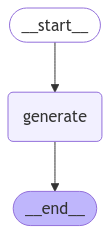

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception: 
    pass

In [7]:
response = graph.invoke({"messages": ["안녕하세요! 저는 이성용입니다"]})

print(type(response))
response

<class 'langgraph.pregel.io.AddableValuesDict'>


{'messages': [HumanMessage(content='안녕하세요! 저는 이성용입니다', additional_kwargs={}, response_metadata={}, id='7451775b-784b-4f44-921f-1579aa33262b'),
  AIMessage(content='안녕하세요, 이성용님! 만나서 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 15, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-319ab110-604a-4f35-9a1d-5a1cf95e29de-0', usage_metadata={'input_tokens': 15, 'output_tokens': 22, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [8]:
response["messages"].append("제 이름을 아시나요?")
graph.invoke(response)

{'messages': [HumanMessage(content='안녕하세요! 저는 이성용입니다', additional_kwargs={}, response_metadata={}, id='7451775b-784b-4f44-921f-1579aa33262b'),
  AIMessage(content='안녕하세요, 이성용님! 만나서 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 15, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-319ab110-604a-4f35-9a1d-5a1cf95e29de-0', usage_metadata={'input_tokens': 15, 'output_tokens': 22, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='제 이름을 아시나요?', additional_kwargs={}, response_metadata={}, id='48edbf03-

In [9]:
inputs = {"messages": [("human", "한국과 일본의 관계에 대해 자세히 알려줘")]}
for chunk, _ in graph.stream(inputs, stream_mode="messages"):
    print(chunk.content, end="")

한국과 일본의 관계는 역사적으로 복잡하고 다층적입니다. 두 나라는 지리적으로 가까이 위치해 있으며, 문화적 교류가 있었지만, 역사적 이유로 갈등도 많았습니다.

### 역사적 배경
1. **고대와 중세**: 한국과 일본은 고대부터 교류가 있었으며, 특히 신라와 일본의 가나구리(한반도의 문화)가 서로 영향을 주었습니다. 불교, 한자, 다양한 기술과 문화가 서로 전파되었습니다.

2. **일제강점기**: 1910년부터 1945년까지의 기간은 두 나라 관계에 큰 상처를 남겼습니다. 일본은 한국을 식민지로 삼아 강제로 지배했고, 이 과정에서 많은 한국인들이 고통을 받았습니다. 특히, 위안부 문제와 강제 징용 등이 지금까지도 양국 간의쟁점으로 남아 있습니다.

3. **전후 관계**: 1945년 한국이 해방된 후에도 일본과의 관계는 상대적으로 냉랭했습니다. 1965년 한일기본조약 체결을 통해 외교 관계가 정상화되었고, 경제 협력이 시작되었습니다.

### 현대의 관계
1. **경제적 관계**: 두 나라는 서로에게 중요한 무역 파트너입니다. 한국의 반도체, 자동차 산업과 일본의 전자기기, 기계산업이 서로 상호 보완적인 관계를 이루고 있습니다.

2. **정치적 갈등**: 역사적 문제와 함께 영토 분쟁(독도, 일본에서는 다케시마로 칭함)도 양국 간의 긴장을 초래하고 있습니다. 또한, 일본 정부의 역사 인식 문제와 관련된 각종 사건들이 갈등의 불씨가 되고 있습니다.

3. **문화 교류**: K-pop, 일본 애니메이션, 드라마 등 문화 교류는 활발히 이루어지고 있으며, 이는 두 나라 국민 간의 이해를 높이는 데 기여하고 있습니다.

4. **안보 협력**: 북한의 위협 등 현실적인 안보 문제 때문에 군사적 협력에 대한 필요성이 커지고 있으나, 역사적 갈등이 여전히 발목을 잡고 있습니다.

### 결론
한국과 일본의 관계는 역사적 상처와 현대적 이해가 얽혀 있는 복잡한 형태입니다. 앞으로 두 나라가 과거의 아픔을 극복하고 상호 이해를 높이는 방향으로 나아가길 기대합니다.